### 과제) mpg 데이터를 이용해서 오늘 배운 내용을 적용시켜 주세요!
- 모든 컬럼에 대해서 한 번씩 다 이용해주시고
- 분석가가 찾고자 하는 질문을 적어주시고 해당 질문을 추출할 수 있는 코드를 작성해주세요!
- 꼭 주석처리해서 인사이트를 정리해 주세요!
- ex) audi a4에 대한 연비에 대한 요약통계
- 각 컬럼 당 최소 5개 이상 질문!
- 랜덤 발표!

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("mpg.csv") # mpg 데이터 가져오기

In [4]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [5]:
df.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [6]:
# 연료 종류(fl)별 실린더 수(cyl)의 총 개수
df.groupby("fl").agg(ct=("cyl", "count"))

,ct
fl,
c,1
d,5
e,8
p,52
r,168


In [7]:
# 변속기 종류(trans)별 실린더 수(cyl)의 총 개수
df.groupby("trans").agg(ct=("cyl", "count"))

,ct
trans,
auto(av),5
auto(l3),2
auto(l4),83
auto(l5),39
auto(l6),6
auto(s4),3
auto(s5),3
auto(s6),16
manual(m5),58


In [8]:
# 제조사(manufacturer)가 volkswagen이고 모델명(model)이 jetta인 차의 요약통계량
df.query("manufacturer == 'volkswagen' and model == 'jetta'").describe()

,displ,year,cyl,cty,hwy
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2.277778,2003.000000,4.666667,21.222222,29.111111
std,0.370060,4.743416,0.866025,4.867694,6.071335
min,1.900000,1999.000000,4.000000,16.000000,23.000000
25%,2.000000,1999.000000,4.000000,19.000000,26.000000
50%,2.000000,1999.000000,4.000000,21.000000,29.000000
75%,2.500000,2008.000000,5.000000,21.000000,29.000000
max,2.800000,2008.000000,6.000000,33.000000,44.000000


In [9]:
# 제조사(manufacturer)가 toyota이고 모델명(model)이 camry인 차의 요약통계량
df.query("manufacturer == 'toyota' and model == 'camry'").describe()

,displ,year,cyl,cty,hwy
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2.671429,2002.857143,4.857143,19.857143,28.285714
std,0.499047,4.810702,1.069045,1.463850,2.138090
min,2.200000,1999.000000,4.000000,18.000000,26.000000
25%,2.300000,1999.000000,4.000000,18.500000,26.500000
50%,2.400000,1999.000000,4.000000,21.000000,28.000000
75%,3.000000,2008.000000,6.000000,21.000000,30.000000
max,3.500000,2008.000000,6.000000,21.000000,31.000000


In [10]:
# 제조사(manufacturer)가 audi인 차의 모델명(model)의 종류 및 개수
df.query("manufacturer == 'audi'").model.value_counts().to_frame()

,model
a4 quattro,8
a4,7
a6 quattro,3


<AxesSubplot:ylabel='Frequency'>

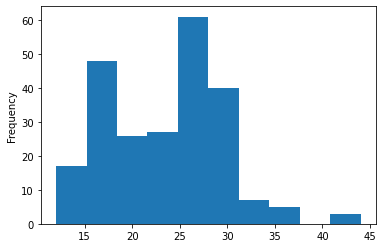

In [11]:
# 데이터의 고속도로 연비(hwy) 시각화
df["hwy"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

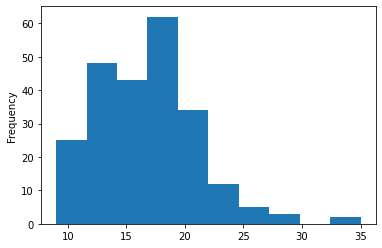

In [12]:
# 데이터의 도시 연비(cty) 시각화
df["cty"].plot.hist()

In [13]:
# 연도(year)별 고속도로 연비(hwy)의 최대값과 최소값
df.groupby("year").agg(max_hwy=("hwy", "max"), 
                      min_hwy=("hwy", "min"))

,max_hwy,min_hwy
year,,
1999,44,15
2008,37,12


In [14]:
# 연도(year)별 도시 연비(cty)의 최대값과 최소값
df.groupby("year").agg(max_cty=("cty", "max"), 
                      min_cty=("cty", "min"))

,max_cty,min_cty
year,,
1999,35,11
2008,28,9


In [15]:
# 자동차 종류(category)가 minivan인 차들 중에서 배기량(displ) 데이터만 추출
df.query("category == 'minivan'")["displ"].to_frame()

,displ
37,2.4
38,3.0
39,3.3
40,3.3
41,3.3
42,3.3
43,3.3
44,3.8
45,3.8
46,3.8


In [16]:
# 자동차 종류(category)가 suv인 차들 중에서 구동 방식(drv) 데이터만 추출
df.query("category == 'suv'")["drv"].value_counts().to_frame()

,drv
4,51
r,11


In [17]:
# 배기량(displ)이 2보다 작은 차들의 제조사(manufacturer)의 종류와 개수
df.query("displ <= 2")["manufacturer"].value_counts().to_frame()

,manufacturer
volkswagen,17
honda,9
audi,8
toyota,5
hyundai,4


In [18]:
# 구동 방식(drv)별 도시 연비(cty)와 고속도로 연비(hwy)의 평균
df.groupby("drv").agg(mean_cty=("cty", "mean"), 
                     mean_hwy=("hwy", "mean"))

,mean_cty,mean_hwy
drv,,
4,14.330097,19.174757
f,19.971698,28.160377
r,14.080000,21.000000


In [19]:
# 변속기(trans)가 수동인 데이터만 추출
df.query("trans in ['manual(m5)', 'manual(m6)']")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
223,volkswagen,new beetle,2.0,1999,4,manual(m5),f,21,29,r,subcompact
225,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact
227,volkswagen,passat,1.8,1999,4,manual(m5),f,21,29,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize


In [20]:
# 변속기(trans)가 수동인 데이터의 배기량(displ)을 오름차순 정렬
df.query("trans in ['manual(m5)', 'manual(m6)']").sort_values("displ")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
101,honda,civic,1.6,1999,4,manual(m5),f,25,32,r,subcompact
102,honda,civic,1.6,1999,4,manual(m5),f,23,29,p,subcompact
99,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact
104,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact
195,toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact
...,...,...,...,...,...,...,...,...,...,...,...
55,dodge,dakota pickup 4wd,5.2,1999,8,manual(m5),4,11,17,r,pickup
98,ford,mustang,5.4,2008,8,manual(m6),r,14,20,p,subcompact
23,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater
25,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater


In [21]:
# 변속기(trans)가 수동인 데이터의 모델명(model) 종류와 개수
df.query("trans in ['manual(m5)', 'manual(m6)']")["model"].value_counts().to_frame()

,model
jetta,5
mustang,5
civic,5
ram 1500 pickup 4wd,4
toyota tacoma 4wd,4
tiburon,4
a4 quattro,4
impreza awd,4
a4,3
forester awd,3


In [22]:
# 변속기(trans)가 수동인 데이터의 요약통계량
df.query("trans in ['manual(m5)', 'manual(m6)']").describe()

,displ,year,cyl,cty,hwy
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,2.966234,2002.974026,5.246753,18.675325,25.779221
std,1.187059,4.498462,1.479294,4.488118,5.961772
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.000000,1999.000000,4.000000,15.000000,23.000000
50%,2.500000,1999.000000,4.000000,18.000000,26.000000
75%,3.500000,2008.000000,6.000000,21.000000,29.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [23]:
# 연료 종류(fl)별 배기량(displ)의 중앙값
df.groupby("fl").agg(med_displ=("displ", "median"))

,med_displ
fl,
c,1.80
d,1.90
e,4.70
p,2.80
r,3.35


In [24]:
# 연도(year)별 도시 연비(cty)와 고속도로 연비(hwy)의 평균과 표준편차
df.groupby("year").agg(mean_cty=("cty", "mean"), 
                      std_cty=("cty", "std"), 
                      mean_hwy=("hwy", "mean"), 
                      std_hwy=("hwy", "std"))

,mean_cty,std_cty,mean_hwy,std_hwy
year,,,,
1999,17.017094,4.458589,23.427350,6.084628
2008,16.700855,4.056211,23.452991,5.847923


In [25]:
# 제조사(manufacturer)가 hyundai인 차의 자동차 종류(category)와 개수
df.query("manufacturer == 'hyundai'")["category"].value_counts().to_frame()

,category
midsize,7
subcompact,7


In [26]:
# 실린더 수(cyl)가 6개 이상인 차의 연료 종류(fl)를 내림차순으로 정렬
df.query("cyl >= 6").sort_values("fl", ascending=False)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
85,ford,f150 pickup 4wd,4.6,1999,8,manual(m5),4,13,16,r,pickup
81,ford,explorer 4wd,4.6,2008,8,auto(l6),4,13,19,r,suv
93,ford,mustang,4.0,2008,6,auto(l5),r,16,24,r,subcompact
92,ford,mustang,4.0,2008,6,manual(m5),r,17,26,r,subcompact
91,ford,mustang,3.8,1999,6,auto(l4),r,18,25,r,subcompact
...,...,...,...,...,...,...,...,...,...,...,...
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,11,14,e,suv
31,chevrolet,k1500 tahoe 4wd,6.5,1999,8,auto(l4),4,14,17,d,suv


In [27]:
# 구동 방식(drv)이 사륜구동인 차의 앞 10개 데이터
df.query("drv == '4'").head(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
10,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact
11,audi,a4 quattro,2.8,1999,6,auto(l5),4,15,25,p,compact
12,audi,a4 quattro,2.8,1999,6,manual(m5),4,17,25,p,compact
13,audi,a4 quattro,3.1,2008,6,auto(s6),4,17,25,p,compact
14,audi,a4 quattro,3.1,2008,6,manual(m6),4,15,25,p,compact
15,audi,a6 quattro,2.8,1999,6,auto(l5),4,15,24,p,midsize
16,audi,a6 quattro,3.1,2008,6,auto(s6),4,17,25,p,midsize


In [28]:
# 자동차 종류(category) compact이고 구동 방식(drv)이 전륜구동인 차의 뒤 5개 데이터
df.query("category == 'compact' and drv == 'f'").tail()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
216,volkswagen,jetta,2.0,2008,4,manual(m6),f,21,29,p,compact
217,volkswagen,jetta,2.5,2008,5,auto(s6),f,21,29,r,compact
218,volkswagen,jetta,2.5,2008,5,manual(m5),f,21,29,r,compact
219,volkswagen,jetta,2.8,1999,6,auto(l4),f,16,23,r,compact
220,volkswagen,jetta,2.8,1999,6,manual(m5),f,17,24,r,compact


In [29]:
# 연료 종류(fl)가 디젤이고 실린더 수(cyl)가 5 이하인 차의 데이터 추출
df.query("fl == 'd' and cyl <= 5")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


<AxesSubplot:ylabel='Frequency'>

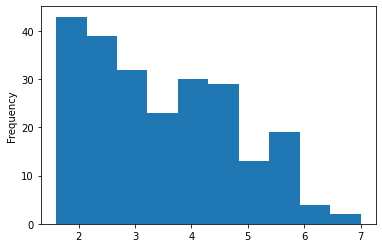

In [30]:
# 데이터의 배기량(displ) 시각화
df["displ"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

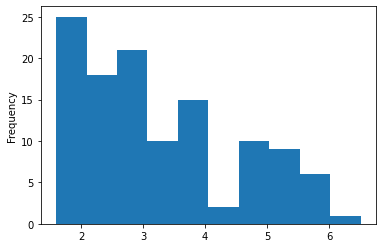

In [31]:
# 1999년 차량(year)의 배기량(displ) 시각화
df.query("year == 1999")["displ"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

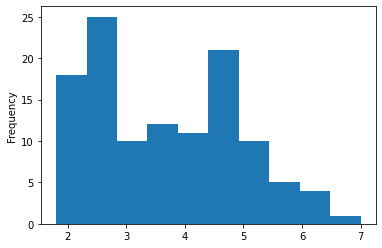

In [32]:
# 2008년 차량(year)의 배기량(displ) 시각화
df.query("year == 2008")["displ"].plot.hist()

In [33]:
# 제조사(manufacturer)별 도시 연비(cty)와 고속도로 연비(hwy)의 평균과 중앙값
df.groupby("manufacturer").agg(mean_cty=("cty", "mean"), 
                              median_cty=("cty", "median"), 
                              mean_hwy=("hwy", "mean"), 
                              median_hwy=("hwy", "median"))

,mean_cty,median_cty,mean_hwy,median_hwy
manufacturer,,,,
audi,17.611111,17.5,26.444444,26.0
chevrolet,15.000000,15.0,21.894737,23.0
dodge,13.135135,13.0,17.945946,17.0
ford,14.000000,14.0,19.360000,18.0
honda,24.444444,24.0,32.555556,32.0
hyundai,18.642857,18.5,26.857143,26.5
jeep,13.500000,14.0,17.625000,18.5
land rover,11.500000,11.5,16.500000,16.5
lincoln,11.333333,11.0,17.000000,17.0


In [34]:
# 제조사(manufacturer)가 chevrolet인 모델(model)의 종류 및 개수
df.query("manufacturer == 'chevrolet'")["model"].value_counts().to_frame()

,model
c1500 suburban 2wd,5
corvette,5
malibu,5
k1500 tahoe 4wd,4


In [35]:
# 실린더 수(cyl)가 6개이거나 구동 방식(drv)이 후륜구동인 차의 연료 종류(fl) 데이터 추출
df.query("cyl == 6 or drv == 'r'")["fl"].value_counts().to_frame()

,fl
r,73
p,24
e,2
d,1


In [36]:
# 자동차 종류(category)와 변속기(trans)를 기준으로 데이터를 오름차순 정렬
df.sort_values(["category", "trans"], ascending=[True, True])

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
24,chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater
26,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater
23,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater
25,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater
27,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater
...,...,...,...,...,...,...,...,...,...,...,...
159,subaru,forester awd,2.5,1999,4,manual(m5),4,18,25,r,suv
161,subaru,forester awd,2.5,2008,4,manual(m5),4,20,27,r,suv
162,subaru,forester awd,2.5,2008,4,manual(m5),4,19,25,p,suv
173,toyota,4runner 4wd,2.7,1999,4,manual(m5),4,15,20,r,suv


In [37]:
# 제조사(manufacturer)와 모델명(model)을 기준으로 데이터를 내림차순 정렬
df.sort_values(["manufacturer", "model"], ascending=[False, False])

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
227,volkswagen,passat,1.8,1999,4,manual(m5),f,21,29,p,midsize
228,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
...,...,...,...,...,...,...,...,...,...,...,...
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [38]:
# 실린더 수(cyl)가 4인 데이터의 앞 5개 데이터만 추출
df.query("cyl == 4").head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact


In [70]:
# 배기량(displ)이 3 이상일 경우 pass, 3 미만일 경우 fail로 할당하는 파생변수 생성
df_1 = df.assign(test=np.where(df["displ"]>=3, "pass", "fail"))

In [71]:
df_1

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,test
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,fail
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,fail
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,fail
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,fail
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,fail
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,fail
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,fail
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,fail
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,fail


In [72]:
# 고속도로 연비(hwy)와 도시 연비(cty) 사이의 차이에 대한 파생변수 생성
df_1 = df.assign(diff=df["hwy"]-df["cty"])

In [73]:
df_1

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,diff
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8


In [74]:
# 연료 종류(fl)와 제조 연도(year)를 기준으로 각각 내림차순, 오름차순 정렬
df.sort_values(["fl", "year"], ascending=[False, True])

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
21,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv
30,chevrolet,k1500 tahoe 4wd,5.7,1999,8,auto(l4),4,11,15,r,suv
32,chevrolet,malibu,2.4,1999,4,auto(l4),f,19,27,r,midsize
34,chevrolet,malibu,3.1,1999,6,auto(l4),f,18,26,r,midsize
37,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan
...,...,...,...,...,...,...,...,...,...,...,...
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact
122,jeep,grand cherokee 4wd,3.0,2008,6,auto(l5),4,17,22,d,suv


In [75]:
# 실린더 수(cyl)가 5개 이하이면서 자동차 종류(category)가 minivan인 데이터 추출
df.query("cyl <= 5 and category == 'minivan'")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
37,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan


<AxesSubplot:ylabel='Frequency'>

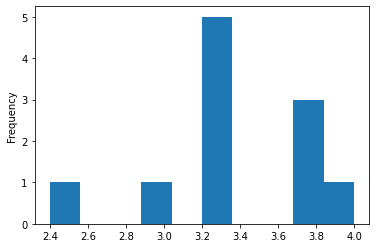

In [76]:
# 모델명(model)이 caravan 2wd인 차의 배기량(displ) 시각화
df.query("model == 'caravan 2wd'")["displ"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

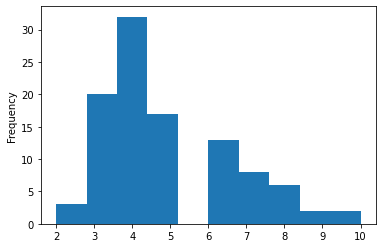

In [79]:
# 구동 방식(drv)이 사륜구동인 차의 연비 차(diff) 시각화
df_1.query("drv == '4'")["diff"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

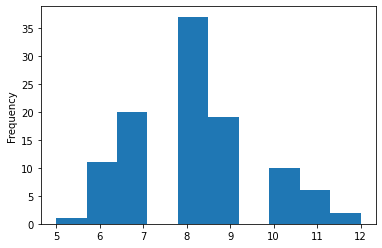

In [80]:
# 구동 방식(drv)이 전륜구동인 차의 연비 차(diff) 시각화
df_1.query("drv == 'f'")["diff"].plot.hist()

In [90]:
# 제조사(manufacturer)가 ford이면서 모델명(model)이 mustang인 차의 배기량(displ) 평균
round(df.query("manufacturer == 'ford' and model == 'mustang'")["displ"].mean(), 2)

4.38

In [91]:
# 도시 연비(cty)와 고속도로 연비(hwy)의 평균에 대한 파생변수 생성
df_1 = df.assign(avg=lambda x: (x["cty"]+x["hwy"])/2)

In [92]:
df_1

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,avg
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [93]:
# 데이터를 연비 평균(avg)를 기준으로 오름차순 정렬
df_1.sort_values("avg")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,avg
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,10.5
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,10.5
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup,10.5
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,10.5
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...
99,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact,30.5
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,32.5
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,35.0
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,38.5
